Некоторые коментарии в этом коде на английском, надеюсь это ок. Это хорошая практика, и учеба и так наполнена английским. Спасибо!

# Description

Some hotel company is experiencing losses. Guests reserver their rooms, but don't show up. We need to make a model that will predict whether a person will show up or not. And then the company can ask for a deposit before reservation.

Отельная сеть теряет деньги на брони, по которой никто не платит деньги. Компания хочет предлагать некоторым гостям внести депозит, если они не появятся, они потеряют депозит.

# Buiness Information

The deposit will cover first night, and costs of one cleaning.

The types of rooms:
- A category: $1000/night $400/cleaning
- B category: $800/night  $350/cleaning
- C category: $600/night  $350/cleaning
- D category: $550/night  $150/cleaning
- E category: $500/night  $150/cleaning
- F category: $450/night  $150/cleaning
- G category: $350/night  $150/cleaning

Season costs adjustment:
- Sprint: 20%
- Summer: 40%
- Fall:   20%

Loss of business is calculated by one night stay and one cleaning

The budget for development of the model is $400,000

# Plan

- import libraries
- inspect data
- run business calculations
- run business calculations with model
- run business calculations with model on the test data
- describe a person who is likely to loose the deposit
- conclusion

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Data Inspection

In [2]:
local_path_df_train = './datasets/hotel_train.csv'
local_path_df_test = './datasets/hotel_test.csv'
web_path_df_train = '/datasets/hotel_train.csv'
web_path_df_test = '/datasets/hotel_test.csv'

In [3]:
if os.path.exists(local_path_df_train):
  df_train_raw = pd.read_csv(local_path_df_train)
elif os.path.exists(web_path_df_train):
  df_train_raw = pd.read_csv(web_path_df_train)
if os.path.exists(local_path_df_test):
  df_test_raw = pd.read_csv(local_path_df_test)
elif os.path.exists(web_path_df_test):
  df_test_raw = pd.read_csv(web_path_df_test)

In order for the model to work we have to have the same number of features, before we clean the data, we will combine test df and train df, and then split them up. This will be especially useful for the OHE.

In [4]:
df_train = df_train_raw
df_test = df_test_raw

In [5]:
df_train['is_train'] = 1
df_test['is_train'] = 0

In [6]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [7]:
print(df.shape)

(97641, 26)


In [8]:
print(df.columns)

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights', 'is_train'],
      dtype='object')


# is_canceled

target feature - guest canceled reservation

In [9]:
print(df['is_canceled'].dtype)

int64


In [10]:
print(pd.unique(df['is_canceled']))

[0 1]


In [11]:
print(df['is_canceled'].sum() / df['is_canceled'].size)

0.37520099138681495


In [12]:
# we have to check ratio 'is_train' == 1 and 'is_train' == 0
print('Train data ratio')
print(df[df['is_train'] == 1]['is_canceled'].sum() / df[df['is_train'] == 1]['is_canceled'].size)
print('Test data ratio')
print(df[df['is_train'] == 0]['is_canceled'].sum() / df[df['is_train'] == 0]['is_canceled'].size)

Train data ratio
0.3686090542550093
Test data ratio
0.3884672343576453


- no missing values
- binary target value, as expected
- distribution of the answers is close to 50/50 ratio

# lead_time

feature - number of days before reservation date

In [13]:
print(df['lead_time'].dtype)

float64


In [14]:
print(df['lead_time'].head())

0     7.0
1    14.0
2     0.0
3     9.0
4    85.0
Name: lead_time, dtype: float64


In [15]:
try:
  df['lead_time'] = df['lead_time'].astype('int64')
except:
  print('could not convert \'lead_time\' to int54')

Lead time for train data


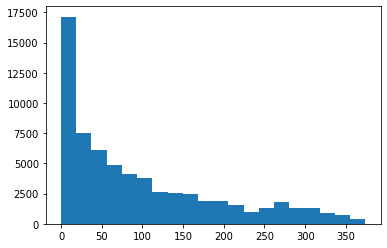

In [16]:
print('Lead time for train data')
plt.hist(df[df['is_train'] == 1]['lead_time'], bins=20)
plt.show()

Lead time for test data


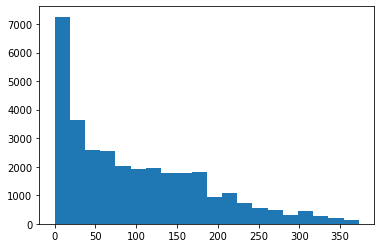

In [17]:
print('Lead time for test data')
plt.hist(df[df['is_train'] == 0]['lead_time'], bins=20)
plt.show()

- changed the data type to int64
- no missing values
- checked for the outliers, data looks uniform
- in this case quantity data will work, it ranges from short period to the longer period

# arrival_date_year

feature - year of the reservation

In [18]:
print(df['arrival_date_year'].dtype)

int64


In [19]:
print(pd.unique(df['arrival_date_year']))

[2015 2016 2017]


- no missing values
- range from 2015 to 2017, it will scale with the scaler

# arrival_date_month 

feature - arrival date

In [20]:
print(df['arrival_date_month'].dtype)

object


In [21]:
print(pd.unique(df['arrival_date_month']))

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


- no missing values
- data type is object
- in the case of month it maces sense to do OHE operation
- OHE because months are very specific and it will work better with algorithms like that

In [22]:
arrival_date_month = pd.get_dummies(df['arrival_date_month'])

In [23]:
print(arrival_date_month.head(2))

   April  August  December  February  January  July  June  March  May  \
0      0       0         0         0        0     1     0      0    0   
1      0       0         0         0        0     1     0      0    0   

   November  October  September  
0         0        0          0  
1         0        0          0  


In [24]:
df = pd.merge(df, arrival_date_month, left_index=True, right_index=True)

# arrival_date_week_number

feature - week of the arrival

In [25]:
print(df['arrival_date_week_number'].dtype)

int64


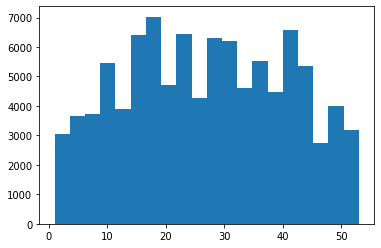

In [26]:
plt.hist(df['arrival_date_week_number'], bins = 20)
plt.show()

- no missing values
- data looks uniform

# arrival_date_day_of_month

feature - day of month

In [27]:
print(df['arrival_date_day_of_month'].dtype)

int64


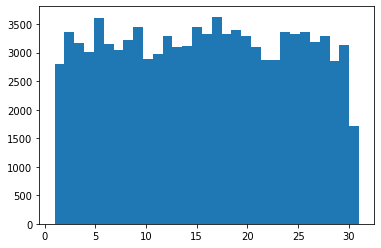

In [28]:
plt.hist(df['arrival_date_day_of_month'], bins=31)
plt.show()

- no missing values
- data looks uniform

# stays_in_weekend_nights

feature - number of nights over weeked

In [29]:
print(df['stays_in_weekend_nights'].dtype)

int64


In [30]:
print(pd.unique(df['stays_in_weekend_nights']))

[0 2 1 4 3]


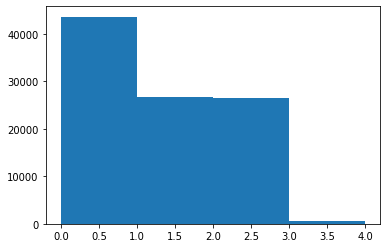

In [31]:
plt.hist(df['stays_in_weekend_nights'], bins=4)
plt.show()

- no missing values
- data looks uniform

# stays_in_week_nights

feature - number of nights over week

In [32]:
print(df['stays_in_week_nights'].dtype)

int64


In [33]:
print(pd.unique(df['stays_in_week_nights']))

[1 2 3 4 5 6 0]


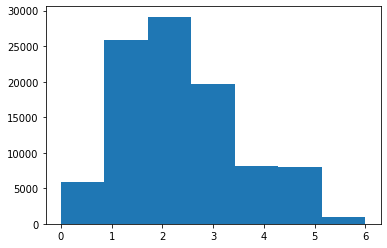

In [34]:
plt.hist(df['stays_in_week_nights'], bins=7)
plt.show()

- not missing values
- data looks uniform

# adults

feature - number of adults

In [35]:
print(df['adults'].dtype)

float64


In [36]:
print(pd.unique(df['adults']))

[1. 2. 3. 4. 0.]


In [37]:
try:
  df['adults'] = df['adults'].astype('int64')
except:
  print('could not convert \'adults\' to int64')

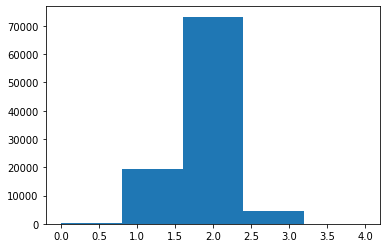

In [38]:
plt.hist(df['adults'], bins=5)
plt.show()

- no missing values
- data looks uniform

# children

feature - number of children age 3 - 14

In [39]:
print(df['children'].dtype)

float64


In [40]:
print(pd.unique(df['children']))

[0. 1. 2. 3.]


In [41]:
try:
  df['children'] = df['children'].astype('int64')
except:
  print('could not convert \'children\' to int64')

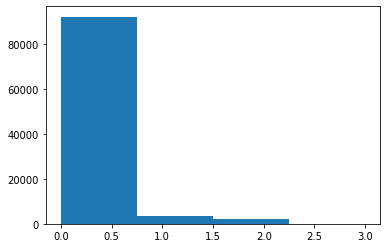

In [42]:
plt.hist(df['children'], bins=4)
plt.show()

- no missing values
- data looks uniform

# babies

feature - number of babies age 0 - 3

In [43]:
print(df['babies'].dtype)

float64


In [44]:
print(pd.unique(df['babies']))

[ 0.  1.  2. 10.  9.]


In [45]:
print(pd.value_counts(df['babies']))

0.0     97014
1.0       618
2.0         7
10.0        1
9.0         1
Name: babies, dtype: int64


There must have been a mistake when entering data, those two values look like outliers. Replace them with 0

In [46]:
df['babies'] = df['babies'].mask(df['babies'] > 2, 0)

In [47]:
print(pd.unique(df['babies']))

[0. 1. 2.]


In [48]:
try:
  df['babies'] = df['babies'].astype('int64')
except:
  print('could not convert \'babies\' to int64')

In [49]:
print(pd.value_counts(df['babies']))

0    97016
1      618
2        7
Name: babies, dtype: int64


- no missing values
- data looks uniform

# meal

feature - the type of the meal plan a person has
- SC - no meal
- BB - breakfast
- HB - breakfast, lunch
- FB - breakfast, lunch, dinner

In [50]:
print(df['meal'].dtype)

object


In [51]:
print(pd.unique(df['meal']))

['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']


In [52]:
df['meal'] = df['meal'].str.strip()

In [53]:
print(pd.unique(df['meal']))

['BB' 'FB' 'HB' 'SC']


apply OHE to this series

In [54]:
meal = pd.get_dummies(df['meal'])

In [55]:
meal.head()

,BB,FB,HB,SC
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


- everything looks good
- ready to merge

In [56]:
df = pd.merge(df, meal, left_index=True, right_index=True)

# country

feature - Citizenship of the visitor

In [57]:
print(df['country'].dtype)

object


In [58]:
print(pd.unique(df['country']))

['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' 'VGB' 'TZA' 'GAB' 'MKD' 'TMP' 'GLP' 'KEN' 'LIE'
 'MMR' 'PAN' 'BFA' 'LBY' 'GNB' 'MLI' 'BHR' 'NAM' 'BOL' 'SYC' 'PRY' 'BRB'
 'ABW' 'SLV' 'DMA' 'CUB' 'PYF' 'UGA' 'GUY' 'LCA' 'ATA' 'RWA' 'MNE' 'FJI'
 'MDG' 'CAF' 'NPL' 'BHS' 'UMI' 'MYT' 'GTM' 'GHA' 'AS

In [59]:
country = pd.get_dummies(df['country'])

- ready to merge

In [60]:
df = pd.merge(df, country, left_index=True, right_index=True)

# distribution_channel

feature - nothing to add

In [61]:
print(df['distribution_channel'].dtype)

object


In [62]:
print(pd.unique(df['distribution_channel']))

['Direct' 'TA/TO' 'Corporate' 'GDS']


In [63]:
print(pd.value_counts(df['distribution_channel']))

TA/TO        81537
Direct       10495
Corporate     5425
GDS            184
Name: distribution_channel, dtype: int64


OHE

In [64]:
distribution_channel = pd.get_dummies(df['distribution_channel'])

In [65]:
print(distribution_channel.shape)

(97641, 4)


- no missing values
- ready to merge

In [66]:
df = pd.merge(df, distribution_channel, left_index=True, right_index=True)

# is_repeated_guest

feature - guest visited before

In [67]:
print(df['is_repeated_guest'].dtype)

int64


In [68]:
print(pd.unique(df['is_repeated_guest']))

[0 1]


- no missing values
- simple binary data
- ready

# previous_cancellations

feature - number of cancellations for this guest

In [69]:
print(df['previous_cancellations'].dtype)

int64


In [70]:
print(pd.value_counts(df['previous_cancellations']))

0     91777
1      5532
2        83
3        57
11       35
24       28
6        22
25       19
26       18
19       17
4        15
5        14
13       12
14       11
21        1
Name: previous_cancellations, dtype: int64


- no missing values
- although data does not seem uniform, it will be useful for our model

# previous_bookings_not_canceled

feature - number of reservations that were successfully used

In [71]:
print(df['previous_bookings_not_canceled'].dtype)

int64


In [72]:
print(pd.unique(df['previous_bookings_not_canceled']))

[ 0  1  2  3  4  5  6 10 12 13 15 21  7  9  8 11 14 18 22 16 17 19 20 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49
 50 51 52 53 54 55 56 57 58 25 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


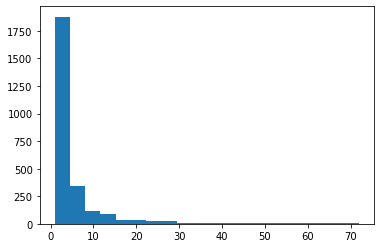

In [73]:
plt.hist(df[df['previous_bookings_not_canceled'] > 0]['previous_bookings_not_canceled'], bins=20)
plt.show()

- It might be a good idea to assume that those values are outliers but
- if that is a regular client, a businessman who visits often
- it would make them upset to have to go through reservations
- if they visited the hotel every week 50 / year for a year
- seem resonable
- no corrections needed

# reserved_room_type

feature - type of reserved room, different price categories

In [74]:
print(df['reserved_room_type'].dtype)

object


In [75]:
print(pd.unique(df['reserved_room_type']))

['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']


In [76]:
df['reserved_room_type'] = df['reserved_room_type'].str.strip()

In [77]:
print(pd.unique(df['reserved_room_type']))

['A' 'C' 'D' 'E' 'G' 'F' 'B']


OHE

In [78]:
reserved_room_type = pd.get_dummies(df['reserved_room_type'])

In [79]:
print(reserved_room_type.shape)

(97641, 7)


- no missing values
- ready to merge

In [80]:
df = pd.merge(df, reserved_room_type, left_index=True, right_index=True)

# booking_changes

feature - number of times a person changed the reservation parameters

In [81]:
print(df['booking_changes'].dtype)

int64


In [82]:
print(pd.unique(df['booking_changes']))

[ 0  1  3  2  4  5  6 10 16  7  9 13  8 14 15 17 18 11]


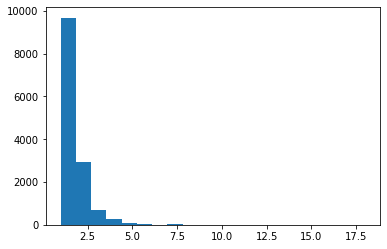

In [83]:
plt.hist(df[df['booking_changes'] > 0]['booking_changes'], bins=20)
plt.show()

- no missing values
- all of the data is useful for the model, we will not drop anything

# days_in_waiting_list

feature - how many days it took to confirm reservation

In [84]:
print(df['days_in_waiting_list'].dtype)

int64


In [85]:
print(pd.unique(df['days_in_waiting_list']))

[  0  50  47  65 122  75 101 150 125  22 142   2  13  44  38  48  33  77
  21  80  59  40  58  89  53  49  60  69  87  91  57  99 111  79  98  85
  63  15   3  20  93   4  41  34 224  31  39  56 187 176  71  55  96 236
 259 207 215 160 120  30  32  27  62  24 108 147   5  14 107  70   8  35
 178 174 162  68  11 193  10  76  17  45   6  19  28  42  25  46   9   1
  43  72  12  61  81  74 167 100 121  83 113  18 185 109 154  64  16 165
   7  84 175 183  23 117  54  26  73 223 105  36]


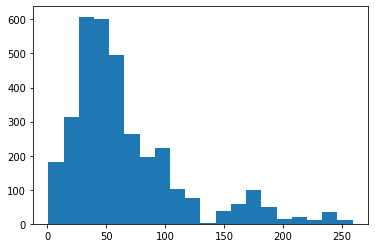

In [86]:
plt.hist(df[df['days_in_waiting_list'] > 0]['days_in_waiting_list'], bins=20)
plt.show()

- no missing values
- the distribution seems normal

# customer_type

feature - contract / group / transient / transient-praty

In [87]:
print(df['customer_type'].dtype)

object


In [88]:
print(pd.unique(df['customer_type']))

['Transient' 'Contract' 'Transient-Party' 'Group']


In [89]:
customer_type = pd.get_dummies(df['customer_type'])

In [90]:
print(customer_type.head())

   Contract  Group  Transient  Transient-Party
0         0      0          1                0
1         0      0          1                0
2         0      0          1                0
3         0      0          1                0
4         0      0          1                0


- no missing values
- ready to merge

In [91]:
df = pd.merge(df, customer_type, left_index=True, right_index=True)

# required_car_parking_spaces

feature - required parking spaces

In [92]:
print(df['required_car_parking_spaces'].dtype)

int64


In [93]:
print(pd.unique(df['required_car_parking_spaces']))

[0 1 2 3 8]


In [94]:
print(pd.value_counts(df['required_car_parking_spaces']))

0    92482
1     5138
2       17
3        2
8        2
Name: required_car_parking_spaces, dtype: int64


- 8 parking spots seems like an outlier

In [95]:
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].replace(8, 0)

In [96]:
print(pd.value_counts(df['required_car_parking_spaces']))

0    92484
1     5138
2       17
3        2
Name: required_car_parking_spaces, dtype: int64


# total_of_special_requests

feature - number of special requests

In [97]:
print(df['total_of_special_requests'].dtype)

int64


In [98]:
print(pd.unique(df['total_of_special_requests']))

[0 1 3 2 4 5]


- no missing values
- ready to merge

# total_nights

feature - total number of nights

In [99]:
print(df['total_nights'].dtype)

int64


In [100]:
print(pd.unique(df['total_nights']))

[ 1  2  3  4  6  7  5  8 10  9]


- no missing values
- ready to merge

# df_train df_test

In [101]:
df_train = df[df['is_train'] == 1]
df_test =  df[df['is_train'] == 0]

In [102]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [103]:
df_train = df_train.drop(['is_train'], axis=1)
df_test = df_test.drop(['is_train'], axis=1)

In [104]:
df_train_features = df_train.drop(
  ['id', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'customer_type'], axis=1)

df_train_target = df_train['is_canceled']

df_test_features = df_test.drop(
  ['id', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'customer_type'], axis=1)

In [105]:
print(df_train_features.columns.size)

222


In [106]:
print(df_test_features.columns.size)

222


# BUSINESS

What is the income without deposits?

People who showed up and payed vs people who didn't show up

price factors:
- showed up
- season
- room type
- duration of the stay

In [107]:
df_business = df_train_raw[['is_canceled', 'arrival_date_month', 'arrival_date_year', 'reserved_room_type', 'total_nights']]

In [108]:
print(pd.unique(df_business['is_canceled']))

[0 1]


In [109]:
print(pd.unique(df_business['arrival_date_month']))

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [110]:
print(pd.unique(df_business['arrival_date_year']))

[2015 2016]


In [111]:
print(pd.unique(df_business['reserved_room_type']))

['A               ' 'C               ' 'D               '
 'E               ' 'G               ' 'F               '
 'B               ']


In [112]:
df_business['reserved_room_type'] = df_business['reserved_room_type'].str.strip()

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/1553549690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['reserved_room_type'] = df_business['reserved_room_type'].str.strip()


In [113]:
print(pd.unique(df_business['reserved_room_type']))

['A' 'C' 'D' 'E' 'G' 'F' 'B']


In [114]:
print(pd.unique(df_business['total_nights']))

[ 1  2  3  4  6  7  5  8 10  9]


In [115]:
price_room_type = {
  'A':1000,
  'B':800,
  'C':600,
  'D':550,
  'E':500,
  'F':450,
  'G':350
}
price_cleaning_room_type = {
  'A':400,
  'B':350,
  'C':350,
  'D':150,
  'E':150,
  'F':150,
  'G':150
}

In [116]:
price_multiplier_month = {
  'July': 1.4,
  'August': 1.4,
  'September': 1.2,
  'October': 1.2,
  'November': 1.2,
  'December': 1.0,
  'January': 1.0,
  'February': 1.0,
  'March': 1.2,
  'April': 1.2,
  'May': 1.2,
  'June': 1.4
}

In [117]:
def calculate_income(row):
  room_type = row['reserved_room_type']
  month = row['arrival_date_month']
  n_nights = row['total_nights']
  price_room = price_room_type[room_type]
  price_cleaning_room = price_cleaning_room_type[room_type]
  season_coefficient = price_multiplier_month[month]
  if (row['is_canceled'] == 1):
    return (price_room + price_cleaning_room) * season_coefficient * -1
  return ((price_room * n_nights) - (price_cleaning_room * (n_nights // 2))) * season_coefficient
  

In [118]:
df_business['costs'] = df_business.apply(lambda row: calculate_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/1269056741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['costs'] = df_business.apply(lambda row: calculate_income(row), axis=1)


In [119]:
print(df_business.head(10))

   is_canceled arrival_date_month  arrival_date_year reserved_room_type  \
0            0               July               2015                  A   
1            0               July               2015                  A   
2            0               July               2015                  C   
3            0               July               2015                  C   
4            1               July               2015                  A   
5            1               July               2015                  D   
6            1               July               2015                  E   
7            0               July               2015                  G   
8            0               July               2015                  D   
9            0               July               2015                  E   

   total_nights   costs  
0             1  1400.0  
1             2  2240.0  
2             2  1190.0  
3             2  1190.0  
4             3 -1960.0  
5             3  -

In [120]:
df_business_monthly = df_business[['arrival_date_month', 'arrival_date_year', 'costs']]

In [121]:
print(df_business_monthly.groupby(['arrival_date_year', 'arrival_date_month']).sum())

                                          costs
arrival_date_year arrival_date_month           
2015              August              3210550.0
                  December            2257550.0
                  July                1590750.0
                  November            3336480.0
                  October             5011080.0
                  September           4162140.0
2016              April               4778760.0
                  August              5862570.0
                  December            3160900.0
                  February            2750250.0
                  January             1910000.0
                  July                6193810.0
                  June                4971890.0
                  March               5716740.0
                  May                 5422200.0
                  November            4403880.0
                  October             4772880.0
                  September           4987920.0


# MODEL

In [122]:
scaler = StandardScaler()
df_train_features = scaler.fit_transform(df_train_features)

In [123]:
tree_depths = range(1, 11)
for tree_depth in tree_depths:
  model = DecisionTreeClassifier(max_depth=tree_depth, random_state=12345)
  scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=6)
  print('Depth:', tree_depth)
  print('Score:', sum(scores) / len(scores))
  

Depth: 1
Score: 0.36594661533019934
Depth: 2
Score: 0.37499874720949106
Depth: 3
Score: 0.5853668631871053
Depth: 4
Score: 0.5271843805563332
Depth: 5
Score: 0.5010518500257019
Depth: 6
Score: 0.47472995456512695
Depth: 7
Score: 0.4753169127803019
Depth: 8
Score: 0.49721742425210996
Depth: 9
Score: 0.5102549425594438
Depth: 10
Score: 0.4881466956480997


In [124]:
tree_counts = range(10, 40, 10)
tree_depths = range(1, 11)
for tree_count in tree_counts:
  print('tree_count', tree_count)
  current_scores = []
  for tree_depth in tree_depths:
    model = RandomForestClassifier(n_estimators=tree_count, max_depth=tree_depth, random_state=12345)
    scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=6)
    current_scores.append(sum(scores) / len(scores))
  max_score = max(current_scores)
  max_score_index = current_scores.index(max_score)
  print('best tree depth', max_score_index + 1)
  print('best score', max_score)

tree_count 10
best tree depth 5
best score 0.5292272726096748
tree_count 20
best tree depth 9
best score 0.4864300475466066
tree_count 30
best tree depth 9
best score 0.49216327805383875


In [125]:
model = LogisticRegression(solver='liblinear', random_state=12345)
scores = cross_val_score(model, df_train_features, df_train_target, scoring='f1', cv=6)
print('LogisticRegression score', sum(scores) / len(scores))

LogisticRegression score 0.500885243119799


the best model is LogisticRegression(solver='liblinear', random_state=12345)

In [126]:
model_tree = DecisionTreeClassifier(max_depth=3, random_state=12345)
model_tree.fit(df_train_features, df_train_target)
series_predicted = model_tree.predict(df_train_features)

In [127]:
df_business['predicted'] = series_predicted

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/1095536524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['predicted'] = series_predicted


In [128]:
def calculate_model_income(row):
  room_type = row['reserved_room_type']
  month = row['arrival_date_month']
  n_nights = row['total_nights']
  price_room = price_room_type[room_type]
  price_cleaning_room = price_cleaning_room_type[room_type]
  season_coefficient = price_multiplier_month[month]
  if (row['is_canceled'] == 1):
    if(row['predicted'] == 1):
      # 80% of money will be saved, by customer loosing his deposit
      return (price_room + price_cleaning_room) * season_coefficient * -1 * 0.2
    return (price_room + price_cleaning_room) * season_coefficient * -1
  return ((price_room * n_nights) - (price_cleaning_room * (n_nights // 2))) * season_coefficient

In [129]:
df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/2648823243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)


Lets look at year 2016 and find how much money we have saved

In [130]:
df_business_2016 = df_business[df_business['arrival_date_year'] == 2016]

In [131]:
total_revenue_2016 = df_business_2016['costs'].sum()
total_revenue_2016_with_model = df_business_2016['model_costs'].sum()

print('DecisionTreeClassifier')
print('2016 raw revenue:', total_revenue_2016)
print('2016 model revenue:', total_revenue_2016_with_model)
print('Percentage increase: {:0.0f}%'.format(total_revenue_2016_with_model / total_revenue_2016 * 100))
print('Money saved:', total_revenue_2016_with_model - total_revenue_2016)

DecisionTreeClassifier
2016 raw revenue: 54931800.0
2016 model revenue: 66279760.0
Percentage increase: 121%
Money saved: 11347960.0


In [132]:
model_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=12345)
model_forest.fit(df_train_features, df_train_target)
series_predicted = model_forest.predict(df_train_features)

In [133]:
df_business['predicted'] = series_predicted

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/1095536524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['predicted'] = series_predicted


In [134]:
df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/2648823243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business['model_costs'] = df_business.apply(lambda row: calculate_model_income(row), axis=1)


In [135]:
df_business_2016 = df_business[df_business['arrival_date_year'] == 2016]

In [136]:
total_revenue_2016 = df_business_2016['costs'].sum()
total_revenue_2016_with_model = df_business_2016['model_costs'].sum()

print('RandomForestClassifier')
print('2016 raw revenue:', total_revenue_2016)
print('2016 model revenue:', total_revenue_2016_with_model)
print('Percentage increase: {:0.0f}%'.format(total_revenue_2016_with_model / total_revenue_2016 * 100))
print('Money saved:', total_revenue_2016_with_model - total_revenue_2016)

RandomForestClassifier
2016 raw revenue: 54931800.0
2016 model revenue: 63197920.0
Percentage increase: 115%
Money saved: 8266120.0


# TEST DATA

In [137]:
# no need for a year, because its all 2017
df_business_2017 = df_test_raw[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]

In [138]:
print(pd.unique(df_business_2017['arrival_date_month']))

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


In [139]:
print(pd.unique(df_business_2017['reserved_room_type']))

['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']


In [140]:
df_business_2017['reserved_room_type'] = df_business_2017['reserved_room_type'].str.strip()

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/1880790177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['reserved_room_type'] = df_business_2017['reserved_room_type'].str.strip()


In [141]:
print(pd.unique(df_business_2017['reserved_room_type']))

['A' 'E' 'G' 'D' 'F' 'C' 'B']


In [142]:
df_business_2017['costs'] = df_business_2017.apply(lambda row: calculate_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/835489900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['costs'] = df_business_2017.apply(lambda row: calculate_income(row), axis=1)


In [143]:
scaler = StandardScaler()
df_test_features = scaler.fit_transform(df_test_features)

In [144]:
series_predicted_2017 = model_tree.predict(df_test_features)

In [145]:
print(series_predicted_2017.sum())

6327


In [146]:
df_business_2017['predicted'] = series_predicted_2017

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/571278239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['predicted'] = series_predicted_2017


In [147]:
df_business_2017['model_costs'] = df_business_2017.apply(lambda row: calculate_model_income(row), axis=1)

/var/folders/7_/tt886s4d5kzb54xrj7p8yyp00000gn/T/ipykernel_6325/2957848983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_2017['model_costs'] = df_business_2017.apply(lambda row: calculate_model_income(row), axis=1)


In [148]:
total_revenue_2017 = df_business_2017['costs'].sum()
total_revenue_2017_with_model = df_business_2017['model_costs'].sum()

print('2017 raw revenue:', total_revenue_2017)
print('2017 model revenue:', total_revenue_2017_with_model)
print('Percentage increase: {:0.0f}%'.format(total_revenue_2017_with_model / total_revenue_2017 * 100))
print('Money saved:', total_revenue_2017_with_model - total_revenue_2017)

2017 raw revenue: 36218760.0
2017 model revenue: 42698560.0
Percentage increase: 118%
Money saved: 6479800.0


# Guest that is likely to loose money

In [149]:
df_train_features = df_train.drop(
  ['id', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'distribution_channel', 'reserved_room_type', 'customer_type'], axis=1)

In [150]:
series_predicted = model_tree.predict(df_train_features)
df_bad_visitor = df_train_features.copy()
df_bad_visitor['predicted'] = series_predicted

/Users/vlad/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [151]:
df_bad_visitor = df_bad_visitor[df_bad_visitor['predicted'] == 1]

In [152]:
print(df_train_features.columns)

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest',
       ...
       'B', 'C', 'D', 'E', 'F', 'G', 'Contract', 'Group', 'Transient',
       'Transient-Party'],
      dtype='object', length=222)


In [153]:
print('mean lead_time', df_train_features['lead_time'].mean())
print('bad lead_time', df_bad_visitor['lead_time'].mean())
print('mean adults', df_train_features['adults'].mean())
print('bad adults', df_bad_visitor['adults'].mean())
print('mean children', df_train_features['children'].mean())
print('bad children', df_bad_visitor['children'].mean())
print('mean babies', df_train_features['babies'].mean())
print('bad babies', df_bad_visitor['babies'].mean())
print('mean is_repeated_guest', df_train_features['is_repeated_guest'].mean())
print('bad is_repeated_guest', df_bad_visitor['is_repeated_guest'].mean())
print('mean booking_changes', df_train_features['booking_changes'].mean())
print('bad booking_changes', df_bad_visitor['booking_changes'].mean())
print('mean previous_bookings_not_canceled', df_train_features['previous_bookings_not_canceled'].mean())
print('bad previous_bookings_not_canceled', df_bad_visitor['previous_bookings_not_canceled'].mean())
print('mean previous_cancellations', df_train_features['previous_cancellations'].mean())
print('bad previous_cancellations', df_bad_visitor['previous_cancellations'].mean())
print('mean required_car_parking_spaces', df_train_features['required_car_parking_spaces'].mean())
print('bad required_car_parking_spaces', df_bad_visitor['required_car_parking_spaces'].mean())
print('mean total_of_special_requests', df_train_features['total_of_special_requests'].mean())
print('bad total_of_special_requests', df_bad_visitor['total_of_special_requests'].mean())
print('mean total_nights', df_train_features['total_nights'].mean())
print('bad total_nights', df_bad_visitor['total_nights'].mean())

mean lead_time 96.33791718407457
bad lead_time 112.14862474419895
mean adults 1.8365757561820664
bad adults 1.7598071520238632
mean children 0.07489000291281485
bad children 0.048142624258610524
mean babies 0.006944763832037897
bad babies 0.007006347334466373
mean is_repeated_guest 0.02715050054423646
bad is_repeated_guest 0.05452464361277791
mean booking_changes 0.1942694200432323
bad booking_changes 0.14217335506919634
mean previous_bookings_not_canceled 0.10771282711677321
bad previous_bookings_not_canceled 0.22878151989178316
mean previous_cancellations 0.12891505312054455
bad previous_cancellations 0.263362353022788
mean required_car_parking_spaces 0.056646583574790355
bad required_car_parking_spaces 0.05244355034511464
mean total_of_special_requests 0.5127627282343743
bad total_of_special_requests 0.32055773299573376
mean total_nights 3.049977770623496
bad total_nights 2.6773611737366028


# CONCLUSION

Основная задача веполнена:
- Построит модель которая будет предсказывать если посетители появятся или нет <br/>

Мы протестировали несколько вариантов моделей с помощью 'cross validation', также ме тестировали разные гиперпараметры. 
- Лучшей моделью оказался DecisionTreeClassifier с f1-score 0.58, что привело к 14% увеличению в прибыли на тренировочной модели и к 12% прибыли на тестировочных данных
- На тестировочных данные мы заработали больше 6 миллионов, что значит исследование окупилось <br/>

Описать клиента оказалось довольно трудно, но некоторые показатили можно выявить
- меньше детей
- дольше занимает время до подтверждения брони
- чаще повторные клиенты, что может говорить о неудовлетворении гостей
